#Mon code    
## Deo MUnduku Hanoi le 02/10/2023 vietenam

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install brian2


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 37.6 MB/s eta 0:00:00


## utilisation de briant2

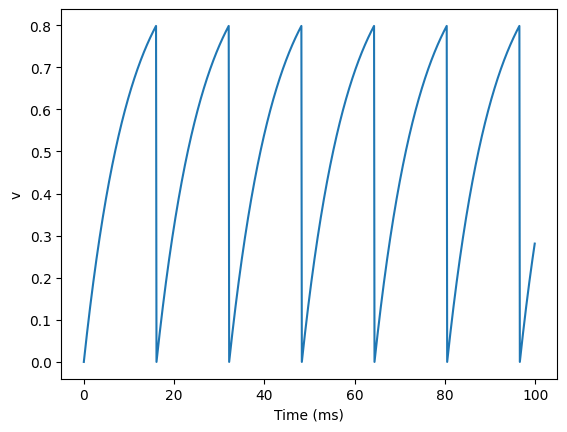

In [ ]:
from brian2 import *

# Configuration des équations du modèle
tau = 10*ms
eqs = '''
dv/dt = (1-v)/tau : 1
'''

# Création d'un groupe de neurones
G = NeuronGroup(1, eqs, threshold='v>0.8', reset='v=0', method='exact')

# Surveillance de la variable 'v'
M = StateMonitor(G, 'v', record=True)

# Simulation
run(100*ms)

# Tracer la variable 'v' en fonction du temps
import matplotlib.pyplot as plt
plt.plot(M.t/ms, M.v[0])
plt.xlabel('Time (ms)')
plt.ylabel('v')
plt.show()


In [ ]:
import os
import cv2

def check_images_in_directory(directory):
    if not os.path.exists(directory):
        print(f"Le dossier spécifié n'existe pas : {directory}")
        return

    print(f"Vérification des images dans le dossier : {directory}")
    image_files = []

    # Parcourir le dossier et ses sous-dossiers
    for root, dirs, files in os.walk(directory):
        for file in files:
            # Construire le chemin complet du fichier
            filepath = os.path.join(root, file)
            # Tenter de charger l'image
            img = cv2.imread(filepath)
            if img is not None:
                print(f"Image chargée avec succès : {filepath}")
                image_files.append(filepath)
            else:
                print(f"Échec du chargement de l'image : {filepath}")

    if not image_files:
        print("Aucune image valide trouvée.")
    else:
        print(f"Nombre total d'images valides trouvées : {len(image_files)}")

# Remplacez '/path/to/your/directory' par votre chemin réel
check_images_in_directory('/content/drive/MyDrive/img/deo')


Vérification des images dans le dossier : /content/drive/MyDrive/img/deo
Image chargée avec succès : /content/drive/MyDrive/img/deo/deo71.png
Image chargée avec succès : /content/drive/MyDrive/img/deo/deo51.png
Image chargée avec succès : /content/drive/MyDrive/img/deo/deo125.png
Image chargée avec succès : /content/drive/MyDrive/img/deo/deo107.png
Image chargée avec succès : /content/drive/MyDrive/img/deo/deo117.jpeg
Image chargée avec succès : /content/drive/MyDrive/img/deo/deo41.png
Image chargée avec succès : /content/drive/MyDrive/img/deo/deo121.png
Image chargée avec succès : /content/drive/MyDrive/img/deo/deo132.png
Image chargée avec succès : /content/drive/MyDrive/img/deo/deo91.png
Image chargée avec succès : /content/drive/MyDrive/img/deo/deo186.jpeg
Image chargée avec succès : /content/drive/MyDrive/img/deo/deo188.png
Image chargée avec succès : /content/drive/MyDrive/img/deo/deo118.png
Image chargée avec succès : /content/drive/MyDrive/img/deo/deo158.jpeg
Image chargée avec

Nombre d'images chargées : 188
Dimensions d'une image exemple : (100, 100)
Valeur maximale dans une image exemple : 0.39215686274509803
Valeur minimale dans une image exemple : 0.0


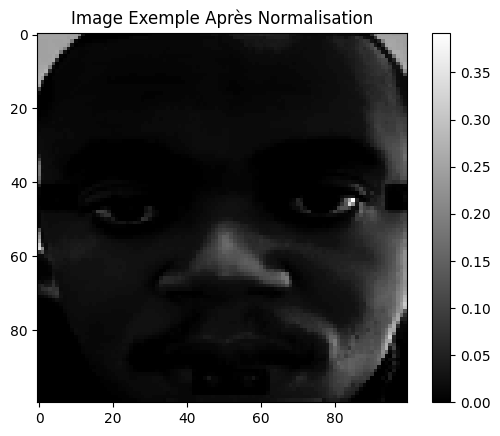

In [ ]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt

# Fonction pour charger et normaliser les images à partir d'une structure de dossiers imbriqués
def load_and_normalize_images(directory, image_size=(100, 100)):
    images = []
    labels = []
    # Parcourir le dossier racine et tous les sous-dossiers
    for root, dirs, files in os.walk(directory):
        for file in files:
            # Construire le chemin complet de chaque fichier
            filepath = os.path.join(root, file)
            # Lire l'image en niveaux de gris
            img = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                # Redimensionner l'image
                img = cv2.resize(img, image_size)
                # Normaliser les pixels de l'image
                img = img / 255.0
                images.append(img)
                # Utiliser le nom du sous-dossier comme label
                labels.append(os.path.basename(root))
            else:
                print(f"Failed to load image at {filepath}")
    return np.array(images), labels

# Spécifiez le chemin d'accès à votre dossier d'images
images, labels = load_and_normalize_images('/content/drive/MyDrive/img/deo')

# Afficher le nombre d'images chargées et quelques détails
print(f"Nombre d'images chargées : {len(images)}")
if len(images) > 0:
    print(f"Dimensions d'une image exemple : {images[0].shape}")
    print(f"Valeur maximale dans une image exemple : {np.max(images[0])}")
    print(f"Valeur minimale dans une image exemple : {np.min(images[0])}")

# Fonction pour visualiser une image
def visualize_sample_image(image):
    plt.imshow(image, cmap='gray')
    plt.colorbar()
    plt.title("Image Exemple Après Normalisation")
    plt.show()

# Visualiser la première image, si disponible
if len(images) > 0:
    visualize_sample_image(images[0])
else:
    print("Aucune image n'a été chargée. Vérifiez le chemin et les formats des images.")


In [ ]:
def rate_encoding(image, max_rate=100, duration=1.0, dt=0.001):
    # Calculer le nombre total de pas de temps
    steps = int(duration / dt)
    # Créer un tableau de sorties pour les spikes
    spike_train = np.zeros((image.shape[0], image.shape[1], steps))

    # Pour chaque pixel, générer un train de spike basé sur la valeur du pixel
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rate = image[i, j] * max_rate  # Taux de spike proportionnel à l'intensité du pixel
            # Calculer le nombre de spikes
            num_spikes = int(steps * rate * dt)
            # Générer des instants de spike aléatoires
            spike_times = np.random.choice(steps, num_spikes, replace=False)
            spike_train[i, j, spike_times] = 1

    return spike_train

# Appliquer le codage par taux à une image exemple
encoded_image = rate_encoding(images[0])
print(f"Encoded image shape (should be 100x100x{int(1.0 / 0.001)}): {encoded_image.shape}")


Encoded image shape (should be 100x100x1000): (100, 100, 1000)


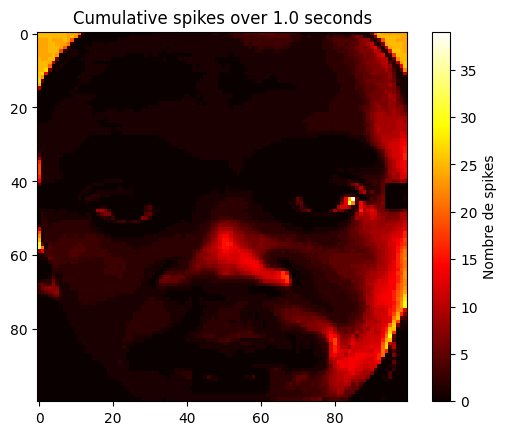

In [ ]:
def visualize_encoded_image(encoded_image, dt=0.001):
    time_steps = encoded_image.shape[2]
    # Somme sur l'axe du temps pour obtenir le nombre total de spikes à chaque pixel
    spike_counts = np.sum(encoded_image, axis=2)
    plt.imshow(spike_counts, cmap='hot', interpolation='nearest')
    plt.colorbar(label='Nombre de spikes')
    plt.title(f"Cumulative spikes over {time_steps * dt} seconds")
    plt.show()

# Visualiser les données codées pour la première image
visualize_encoded_image(encoded_image)
